# Lab 05 - Ohm's Law

Edit this cell and provide the information requested:

- Your name:
- Your student number:
- Partner's name:

In [1]:
import numpy as np
import data_entry
import matplotlib.pyplot as plt

## Part A - Grading feedback, overview of the day

***After reviewing and hearing feedback from the last lab, write some notes below about what you learned/what you could improve for this week.***

## Class Discussion: Residuals

**In the cell below, summarize from the class discussion how residuals are useful, and what properties of a residuals graph inform us about the quality of a fit of a model to data.**

- Residuals tell us how to improve the fit of models to data
- They tell us about how to target improvements, by seeing which measurements need to be investigated (e.g. if we see any obvious outliers)
- They tell us if the model is a good choice for the data, if we see that there is no obvious trend (and approximately equal scatter over the $y = 0$ line)
- They tell us if the uncertainties have been estimated reasonably; if we see that ~2/3 of residuals are within $1\sigma$ (i.e. ~2/3 cross $y = 0$) and ~95% are within $2\sigma$ (i.e. ~95% cross $y = 0$) then we conclude that the size of the uncertainty is reasonable compared to the size of the scatter.

## Part B - Familiarize, Part 1 (Build your circuit)

***In the cell below, write any notes from the class discussion on Ohm's law, multimeters, and anything else useful for building the circuit. Record the experimental goal.***

- Ohm's law says the current through a device is proportional to the voltage through it; $I = V/R$. It is not a law of nature, but an empirical rule that many observations have been found to obey.
- **Experimental Goal:** See if resistors obey Ohm's law, and determine the resistance of a resistor.
- Multimeter:
    - Voltmeter/DC Voltage: Set to DC Voltage (one single range for the set of measurements) and connect the voltmeter in parallel with the device being measured (using the V and COM terminals); in this case the resistor.
    - Ammeter/DC Current: Set to DC Current (one single range for the set of measurements) and connect the ammeter in series with the circuit (using the 200mA and COM terminals).
- Power Supply: Use Red (+) and Black (-) terminals

## Part C - Familiarize, Part 2 (Explore the Equipment and Develop a Measurement Strategy)

***Explore the circuit’s operation and make some notes in your notebook. Some questions you might consider are:***
- ***There are knobs on the power supply labelled “Voltage” and “Current”. What do these knobs do?***
- ***What range should you use for the voltage and current meters? Why? Choose one "best" range for each meter to stick for all of your data collection today.***
- ***What will the uncertainties in your voltage and current measurements be?***

- Voltage causes the power supply to produce a voltage difference of X Volts across it. Current causes the power supply to output a current of Y amps.
- We make current and voltage measurements - we find that an appropriate range for the Voltmeter is (min-max) V (as this is what the power supply reasonably supports, and allows us to get a wide range of voltage datapoints) and the appropriate range for the Ammeter is (min-max) mA (as this is the range of output currents for the optimal voltage range). We will use these ranges for the rest of the day.
- Readings of voltage and current are stable for the most part.
- (If readings in voltage/current are stable), uncertainty in voltage/current is instrumental/described by square PDF(stable fixed reading from a measurement device).  Use half of the most significant digit divided by $\sqrt{3}$ to obtain the uncertainty. 
- (If readings in voltage/current are unstable), uncertainty in voltage/current are best described by a Gaussian PDF. Determine the measurement value by the mean of the fluctuating values, and the uncertainty by taking the range of the fluctuations as the 95% confidence interval and dividing by 4. 
- (TA Note: The multimeter manual suggests 0.5%/1% + 1 digit (but this produces very large uncertainties compared to fluctuations), so the manipulation/estimation of uncertainties here is actually a bit subtle if we want the uncertainties to work the way we want. As long as we keep the meters on fixed ranges, the "divide by $2\sqrt{3}$ strategy" should work well.)
- The resistance is chosen so that the uncertainty in the current should always be larger than that in the voltage, so that ignoring the uncertainty in voltage is reasonable.

- **Note: Data in this notebook is totally fabricated, assuming a resistor of 1300 kOhm, and assuming Ohm's law basically holds perfectly (which for the resistor is true; no longer holds for the lightbulb). The fluctuations be not at all consistent with what would actually be observed**
- For our measurement strategy, we take data over evenly spaced voltage points, spanning the entire voltage range that we have chosen above. We do this to constrain the model consistently and for a wide range of input voltages. **(For our fabricated dataset, we suppose the range is from 0.1V-1.5V, and take data in 0.1V increments. We suppose that there were uncertainties on the order of ~0.01V and ~0.01mA).** 

## Part D - Measure and Analyze (Collect Data and Make a Scatter Plot)

In [25]:
de = data_entry.sheet("lab05_data")

Sheet name: lab05_data.csv


Below we plot the data as a scatterplot, along with the (linear) Ohm's law model and a residuals plot. First, we convert the current into Amps:

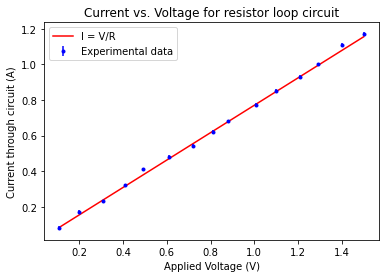

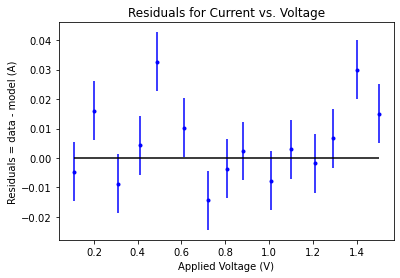

In [51]:
# Data/Model Plot (this is just copied from prelab 5)
# Step 1: find the limits of the data:
xmin = np.min(VVec) # use the np.min function to find the smallest x value
xmax = np.max(VVec) # same for max

# Step 2: generate a bunch of x points between xmin and xmax
xpoints = np.linspace(xmin, xmax, 200) # gives 200 evenly spaced points between xmin and xmax

# Step 3: calculate the model values:
slope = 0.77 # Estimate of the slope.
ypoints = xpoints * slope # this calculates the yvalues at all 200 points.

# Step 4: plot the curve. We plot this as a red line "r-" :
plt.plot(xpoints, ypoints, "r-", label = "I = V/R")

# What's below is exactly what we had earlier:
plt.errorbar(VVec, IVec, uIVec, fmt="bo", markersize = 3, label="Experimental data")
plt.title("Current vs. Voltage for resistor loop circuit")
plt.xlabel("Applied Voltage (V)")
plt.ylabel("Current through circuit (A)")
plt.legend()
plt.show()

# Residuals Plot
# Step 1: Calculate the model at each x-datapoint
ymodel = slope * VVec # y = mx at each x_i

# Step 2: Calcualte the residual vector
RVec = IVec - ymodel

# Step 3: Plot the residual vector against the x-data vector
plt.errorbar(VVec, RVec, uIVec, fmt="bo", markersize = 3)

# Step 4: Add a R = 0 x-axis (horizontal line) to the plot
plt.hlines(y=0, xmin=xmin, xmax=xmax, color='k') # draw axis at y = 0.

# Add axis labels and title, and show the graph
plt.title("Residuals for Current vs. Voltage")
plt.xlabel("Applied Voltage (V)")
plt.ylabel("Residuals = data - model (A)")
plt.show()

Following the steps in the tutorial, we find that $m \approx 0.77 \frac{\text{mA}}{V}$ is the best slope; we find here that the residuals exhibit no obvious trend, with approximately 50/50 spread across the x-axis and 10/15 = 66% (close to 68%) of the error bars crossing the x-axis. We find that $m_{\max} \approx 0.78$ and $m_{\min} \approx 0.76$. We plot the three below:

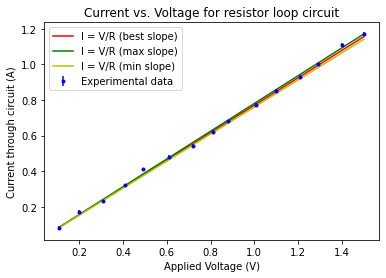

In [53]:
xmin = np.min(VVec) # use the np.min function to find the smallest x value
xmax = np.max(VVec) # same for max
#print (xmin, xmax)  # uncomment to see what the limits are

# Step 2: generate a bunch of x points between xmin and xmax
xpoints = np.linspace(xmin, xmax, 200) # gives 200 evenly spaced points between xmin and xmax

# Step 3: calculate the model values:
best_slope = 0.77
max_slope = 0.78
min_slope = 0.76

best_ypoints = xpoints * slope # this calculates the yvalues at all 200 points.
max_ypoints = xpoints * max_slope
min_ypoints = xpoints * min_slope

# Step 4: plot the curve. We plot this as a red line "r-" :
plt.plot(xpoints, best_ypoints, "r-", label = "I = V/R (best slope)")
plt.plot(xpoints, max_ypoints, "g-", label = "I = V/R (max slope)")
plt.plot(xpoints, min_ypoints, "y-", label = "I = V/R (min slope)")

# What's below is exactly what we had earlier:
plt.errorbar(VVec, IVec, uIVec, fmt="bo", markersize = 3, label="Experimental data")
plt.title("Current vs. Voltage for resistor loop circuit")
plt.xlabel("Applied Voltage (V)")
plt.ylabel("Current through circuit (A)")
plt.legend()
plt.show()

We therefore calculate the uncertainty in the slope $m$ as:

$$u[m] = \frac{m_{\text{max}} - m_{\text{min}}}{2} = \frac{0.78-0.76}{2} = 0.01$$.

So $m \pm u[m] = 0.77 \pm 0.1 \frac{\text{mA}}{\text{V}}$. 

## Part E - IMPROVE, COMPARE, SUMMARIZE, REFLECT

- ***Does the Ohm’s law model describe your data?***
- ***Does the resistance you found match the expected resistance (approximately 1300 $\Omega$)***
- ***Make a comparison with at least one other group. Does your resistance match their resistance (how do we make quantitative comparisons between two values in this course?)***


- The Ohm's law model does appear to describe our data; we see that the linear model fits the data exceedingly well, as evidenced from our residuals plot. We can see that there is an equal scatter of data points above/below the x-axis for our best slope of $m = 0.77$, and there is no obvious trend. In addition, we see that ~68% of error bars cross the x-axis.
- We know that the resistance, as $I = V/R$. First, we convert the units of the slope:
    $$m \pm u[m] = 0.77 \pm 0.01 \frac{\text{mA}}{\text{V}} = 0.00077 \pm 0.00001 \frac{\text{A}}{\text{V}}$$
    Finding the resistance, we therefore have:
    $$R = \frac{1}{0.00077} \Omega = 1298.7 \Omega$$
    For propogating the uncertainty, we recall that for taking the inverse, the uncertainty in the inverse quantity has the same relative uncertainty as the original quantity. So:
    $$u[R] = 1298.8 * \frac{0.00001}{0.00077} = 16.8 \Omega.$$
    So our reported value of the resistance is $1299 \pm 17 \Omega$. We can see that this is totally consistent with the expected resistance (it agrees well within uncertainty). 
- Feynman's group found that $R = 1308 \pm 20 \Omega$. Doing a t-score between our two results, we find:
    $$ t = \frac{\lvert 1299-1309 \rvert}{\sqrt{17^2 + 20^2}} = 0.38$$
    Since $0.38 \ll 1$, we are not at all confident that the results are different; this is good, as we expect to be measuring a resistor with the same resistance!
- **(Could also have a t-score comparison between a direct measurement of the resistance using the multimeter here)**


## Part F - IMPROVE, COMPARE, SUMMARIZE, REFLECT

- We could improve our dataset by:
    - Taking more datapoints in the range we have chosen (i.e. more finely spaced points between 0.1V and 1.5V). This would futher constrain our model in the region we currently have investigated.
    - Taking multiple measurements per voltage and take the average of the results; this will improve the quality of individual datapoints in our dataset.
    - We could expand the range of our dataset by changing our volume ranges on the multimeter; this allows us to constrain Ohm's law over a larger range of voltages, or see if the model continues to hold in other regions. **(Note: this may actually have the effect of worsening things)**

- (Insert some discussion about what improvements were chosen and why here)
- (The analysis done above can be repeated with the improved and/or expanded dataset).

## Part G - Completing the Lab

***Tips:***
- ***A brief summary of how your key results and the results of your analysis and comparisons evolved throughout the lab.***
- ***1-2 sentences to describe and justify your major improvements and how they proved to be successful or unsuccessful (if performed). It may be helpful to use relative uncertainty to quantify your argument.***
- ***1-2 sentences addressing the experimental goal and describing the conclusions you can make from the results of your comparisons.***
- ***1 sentence containing your thoughts for further investigation. If you were to spend more time with this experiment, what would you plan to do next?***

The experimental goal was to determine if Ohm's law holds for a resistor, and to measure this resistance. We found that the linear model of $I = (1/R)V$ indeed was a good fit, as evidenced by the residuals having no obvious trend, equal scatter about the $x = 0$ axis, and ~68% of error bars crossing the $x$-axis. We conclude that Ohm's law holds well for a resistor. In particular, we found that $R = 1299 \pm 17 \Omega$ for the resistor we were using. Through t-score comparison, we found that we are not at all confident that other groups had different values for their resistance, proving to be a good consistency check that we are measuring resistors of similar resistances.

We carried out (hypothetically) the improvements of taking more datapoints and taking multiple measurements per voltage and averaging. These both had the effect of (hypothetically) constraining the model further, and lead to a decrease in the relative uncertainty of the model slope and therefore the resistance measurement. We conclude that the improvements were successful.

For further investigation, it may be interesting to investigate higher ranges of voltages. Does Ohm's law continue to hold for higher voltage inputs, or is the linearity a small $V$ phenomena?